In this file we will create the 2x2 file

## Coding of the 2x2 matrix

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

from genetic_algorithm_pfm.genetic_algorithm_pfm.algorithm import GeneticAlgorithm

In [3]:
# x1 1000 to 60000
# x2 ranges from 0 to 50000m

x1 = 60000
x2 = 450000

c1 = 25   # Costs per material m3
c2 = 4   # Cost of fuel use per L
c3 = 0.1   # Emission of materials per m3
c4 = 1.2   # Emission of fuel per L

k1 = 1.7   # Height of island
k2 = 1.9   # Ship size
k3 = 0.9   # fuel use per km

F1 = x1 * k1 # Material in m3
F2 = k3 * ((F1 / k2) *x2) # Fuel in L

O1 = F1 * c1 + F2 * c2 #total cost
O2 = F1 * c3 + F2 * c4

print(f'Total cost: {O1:.2e} EUR')
print(f"Total emissions: {O2:.2e} kg CO2")

Total cost: 8.70e+10 EUR
Total emissions: 2.61e+10 kg CO2


In [19]:
w1 = .50 #ELIA
w2 = .50 #EIB

def objective_p1(x1, x2):
    """
    Objective to maximize the profit.
    x1: size of the island (in m2)
    x2: distance to the mainland (in m)
    """
    F1 = x1 * k1 # Material in m3
    F2 = k3 * ((F1 / k2) *x2) # Fuel in L

    O1 = F1 * c1 + F2 * c2 
    return pchip_interpolate([3, 25, 100], [100, 20, 0], O1)

def objective_p2(x1, x2):
    """
    Objective to maximize the amount of affordable houses.
    x1: size of the island (in m2)
    x2: distance to the mainland (in m)
    """
    F1 = x1 * k1 # Material in m3
    F2 = k3 * ((F1 / k2) *x2) # Fuel in L

    O2 = F1 * c3 + F2 * c4
    return pchip_interpolate([3, 40, 100], [100, 80, 0], O2)

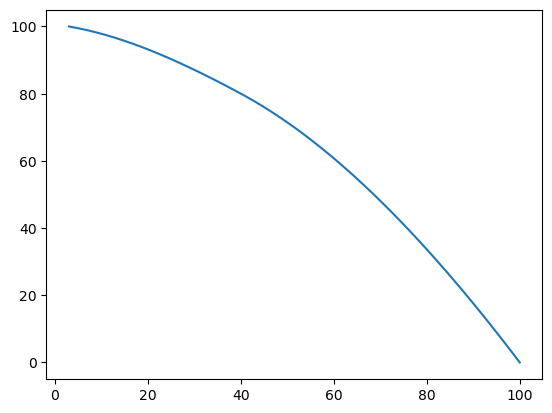

In [18]:
c1 = np.linspace(3, 100)
p1 = pchip_interpolate([3, 40, 100], [100, 80, 0], (c1))

plt.plot(c1, p1)